In [10]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [11]:
col_names = ['age', 'gender', 'SBP', 'DBP', 'diabetes', 'heart_diseases', 'F_H_stroke', 'alcoholic', 'Phy_active','smoking','depression','S_fat_up','fibre_dwn','CKD_kidney','cl_attribute']
# load dataset
pima = pd.read_csv("thesis_data.csv", header=None, names=col_names)

In [12]:
pima.head(10)

,age,gender,SBP,DBP,diabetes,heart_diseases,F_H_stroke,alcoholic,Phy_active,smoking,depression,S_fat_up,fibre_dwn,CKD_kidney,cl_attribute
0,55,1,140,85,1,0,0,1,0,0,1,0,0,0,1
1,53,1,120,85,0,0,1,1,0,0,1,0,0,0,1
2,49,1,120,85,0,0,1,0,0,0,1,0,0,0,0
3,48,0,120,85,0,0,1,1,0,0,1,0,0,0,1
4,47,0,130,85,1,0,1,1,0,1,1,0,0,0,1
5,50,1,130,80,0,0,1,1,0,0,1,0,0,0,1
6,35,0,120,80,0,0,0,0,0,1,1,0,0,0,0
7,80,0,130,75,1,0,0,1,1,1,1,0,0,0,1
8,65,0,160,95,1,1,0,0,1,1,1,0,0,0,0
9,50,0,130,75,0,0,0,0,0,1,1,0,0,0,0


In [13]:
#split dataset in features and target variable
feature_cols = ['age', 'gender', 'SBP', 'DBP', 'diabetes', 'heart_diseases', 'F_H_stroke', 'alcoholic', 'Phy_active','smoking','depression','S_fat_up','fibre_dwn','CKD_kidney']
X = pima[feature_cols] # Features
y = pima.cl_attribute # Target variable

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 80% training and 20% test


In [15]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=20)

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_gini.predict(X_test)


print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : " , metrics.accuracy_score(y_test,y_pred)*100) 
    
print("Report : \n",metrics.classification_report(y_test, y_pred)) 

Confusion Matrix: 
 [[ 3 15]
 [ 1 68]]
Accuracy :  81.60919540229885
Report : 
              precision    recall  f1-score   support

          0       0.75      0.17      0.27        18
          1       0.82      0.99      0.89        69

avg / total       0.80      0.82      0.77        87



In [16]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 81.60919540229885


In [17]:
# Create Decision Tree classifer object
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4,  random_state = 100)

# Train Decision Tree Classifer
clf_entropy = clf_entropy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_entropy.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

print("Confusion Matrix: \n",metrics.confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : " , metrics.accuracy_score(y_test,y_pred)*100) 
    
print("Report : \n",metrics.classification_report(y_test, y_pred)) 

Accuracy: 81.60919540229885
Confusion Matrix: 
 [[ 4 14]
 [ 2 67]]
Accuracy :  81.60919540229885
Report : 
              precision    recall  f1-score   support

          0       0.67      0.22      0.33        18
          1       0.83      0.97      0.89        69

avg / total       0.79      0.82      0.78        87



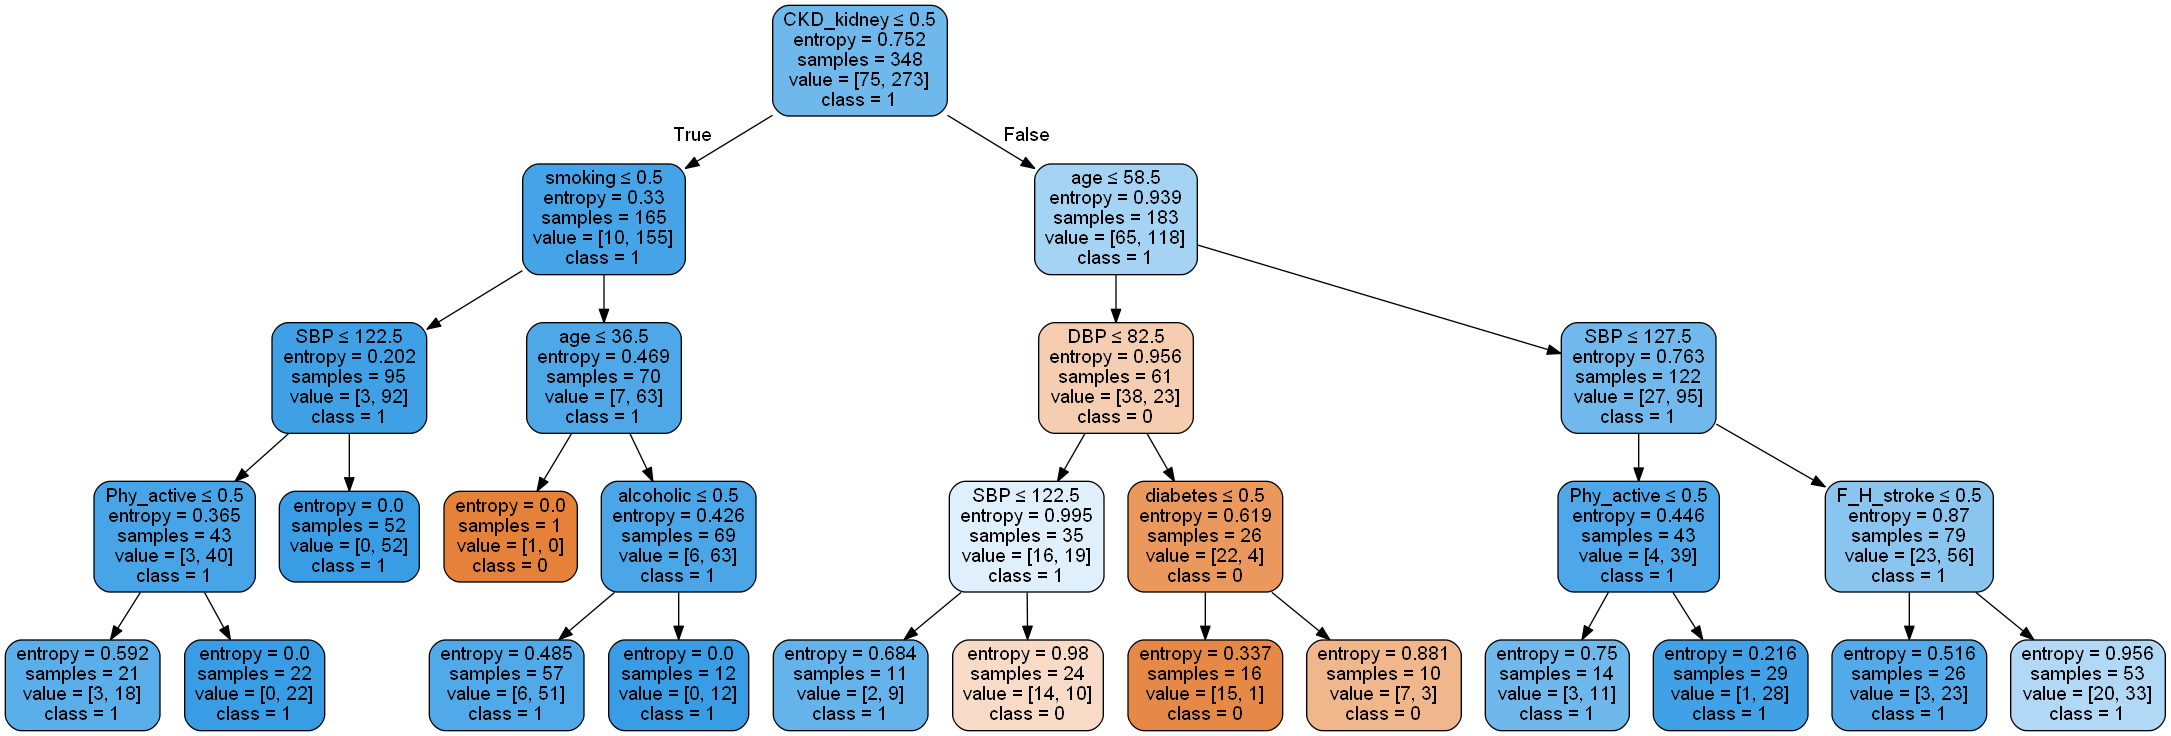

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree10.png')
Image(graph.create_png())
